In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import train_test_split
import operator

In [2]:
MNIST = datasets.load_digits()

In [28]:
def vec2mat(vec, row, col):
    mat = []
    for i in range(0, row):
        mat.append(vec[i * row : i * row + col])
    return mat

In [3]:
# 基于Numpy实现，因为运算性能更好
def Euclidean_Metric(x, y):
    diff = x - y
    # ans = np.dot(diff[i].T, diff[i])
    ans = [np.dot(diff[i].T, diff[i]) for i in range(0, diff.shape[0])]
    ans = np.sqrt(ans)
    return ans

In [67]:
def COS_Metric(x, y):
    ans = np.array([np.dot(x[i].T, y[i])/(np.linalg.norm(x[i], ord = 2) * np.linalg.norm(y[i], ord = 2)) for i in range(0, x.shape[0])])
    return ans

In [76]:
def Tanimoto_Metric(x, y):
    ans = np.array([np.dot(x[i].T, y[i])/(np.dot(x[i].T, y[i]) + np.dot(x[i].T, x[i]) + np.dot(y[i].T, y[i])) for i in range(0, x.shape[0])])
    return ans

In [68]:
distances = COS_Metric(np.array(np.tile(dataTrain[0], (dataTrain.shape[0], 1))),np.array(dataTrain))

In [71]:
distances.argsort()

array([948, 835,  80, ..., 985, 626,   0], dtype=int64)

In [63]:
np.dot(dataTrain[0].T, dataTrain[0])

3439.0

In [45]:
# Euclidean Metric
def classify0(inX, dataSet, labels, k, func):
    dataSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSize, 1))
    # diffMat = diffMat - dataSet
    # sqDiffMat = diffMat**2
    # sqDistances = sqDiffMat.sum(axis = 1)
    # distances = sqDistances**0.5
    # distances = Euclidean_Metric(np.array(diffMat), np.array(dataSet))
    distances = func(np.array(diffMat), np.array(dataSet))
    sortedDisIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        votelLabel = labels[sortedDisIndicies[i]]
        classCount[votelLabel] = classCount.get(votelLabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [25]:
dataTrain, dataTest, labelTrain, labelTest = train_test_split(MNIST.data, MNIST.target, random_state = 5, train_size = 0.6)

In [26]:
k = 5

In [77]:
success = 0
failure = 0
fail_vec = []
fail_lab = []
for i in range(dataTest.shape[0]):
    pred = classify0(dataTest[i], dataTrain, labelTrain, k, Tanimoto_Metric)
    real = labelTest[i]
    if pred == real:
        success += 1
    else:
        print('Pred.={}, Real.{}'.format(pred, real))
        fail_vec.append(dataTest[i])
        fail_lab.append(pred)
        failure += 1
print('Accurancy={:.2f}%'.format(success/(success+failure)*100))

Pred.=1, Real.5
Pred.=1, Real.2
Pred.=0, Real.5
Pred.=1, Real.5
Pred.=0, Real.5
Pred.=4, Real.3
Pred.=4, Real.2
Pred.=1, Real.2
Pred.=4, Real.3
Pred.=1, Real.5
Pred.=1, Real.9
Pred.=7, Real.8
Pred.=9, Real.7
Pred.=6, Real.2
Pred.=5, Real.1
Pred.=3, Real.1
Pred.=1, Real.5
Pred.=2, Real.7
Pred.=7, Real.0
Pred.=3, Real.4
Pred.=1, Real.5
Pred.=5, Real.9
Pred.=2, Real.0
Pred.=1, Real.2
Pred.=5, Real.1
Pred.=6, Real.3
Pred.=5, Real.4
Pred.=1, Real.7
Pred.=1, Real.5
Pred.=1, Real.2
Pred.=3, Real.1
Pred.=9, Real.2
Pred.=6, Real.9
Pred.=1, Real.8
Pred.=0, Real.1
Pred.=1, Real.4
Pred.=6, Real.5
Pred.=2, Real.4
Pred.=4, Real.9
Pred.=1, Real.5
Pred.=1, Real.5
Pred.=1, Real.6
Pred.=1, Real.0
Pred.=5, Real.1
Pred.=1, Real.7
Pred.=4, Real.2
Pred.=6, Real.9
Pred.=2, Real.7
Pred.=1, Real.7
Pred.=6, Real.3
Pred.=6, Real.9
Pred.=1, Real.5
Pred.=9, Real.6
Pred.=9, Real.6
Pred.=2, Real.7
Pred.=6, Real.7
Pred.=5, Real.8
Pred.=7, Real.6
Pred.=0, Real.1
Pred.=6, Real.3
Pred.=3, Real.6
Pred.=5, Real.1
Pred.=7,

Pred.=5, Real.2
Pred.=5, Real.9
Pred.=4, Real.9
Pred.=4, Real.3
Pred.=6, Real.8
Pred.=9, Real.6
Pred.=1, Real.2
Pred.=2, Real.4
Pred.=3, Real.6
Pred.=1, Real.5
Pred.=1, Real.5
Pred.=1, Real.5
Pred.=4, Real.2
Pred.=4, Real.3
Pred.=6, Real.3
Pred.=5, Real.1
Pred.=7, Real.8
Pred.=5, Real.1
Pred.=3, Real.4
Pred.=1, Real.0
Pred.=4, Real.3
Pred.=1, Real.5
Pred.=0, Real.7
Pred.=1, Real.5
Pred.=7, Real.3
Pred.=2, Real.7
Pred.=4, Real.9
Pred.=5, Real.4
Pred.=3, Real.4
Pred.=3, Real.4
Pred.=9, Real.6
Pred.=1, Real.5
Pred.=3, Real.6
Pred.=4, Real.7
Pred.=1, Real.0
Pred.=0, Real.6
Pred.=3, Real.6
Pred.=5, Real.2
Pred.=7, Real.8
Pred.=5, Real.1
Pred.=1, Real.0
Pred.=9, Real.6
Pred.=9, Real.6
Pred.=3, Real.4
Pred.=3, Real.6
Pred.=1, Real.0
Pred.=7, Real.0
Pred.=1, Real.5
Pred.=7, Real.0
Pred.=1, Real.0
Pred.=1, Real.5
Pred.=1, Real.6
Pred.=1, Real.4
Pred.=1, Real.5
Pred.=3, Real.6
Pred.=9, Real.6
Pred.=5, Real.9
Pred.=3, Real.4
Pred.=1, Real.5
Pred.=6, Real.7
Pred.=3, Real.6
Pred.=9, Real.2
Pred.=9,

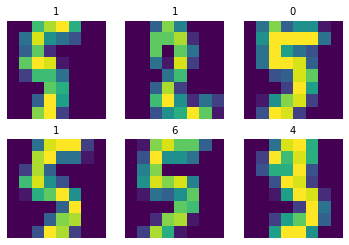

In [73]:
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.imshow(vec2mat(fail_vec[i], 8, 8))
    plt.title(fail_lab[i], fontsize=10)
    plt.axis('off')
plt.show()